In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys  
sys.path.insert(1, '../src')

from core import process_tickers
import data as dtcore
import strategies as st
import backtest as bt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mplcursors import cursor

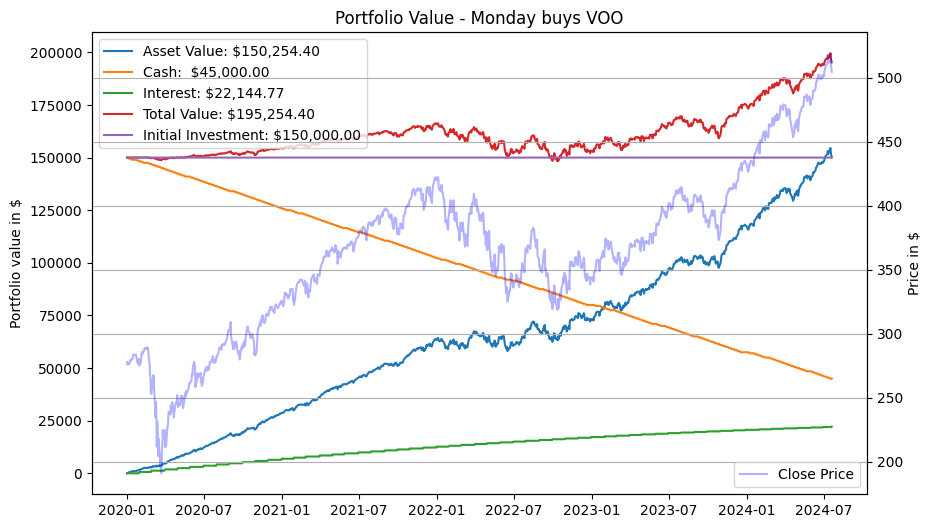

/Users/dewey/repos/backtest4o/notebooks/../src/core.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary = pd.concat([summary, new_row], ignore_index=True)


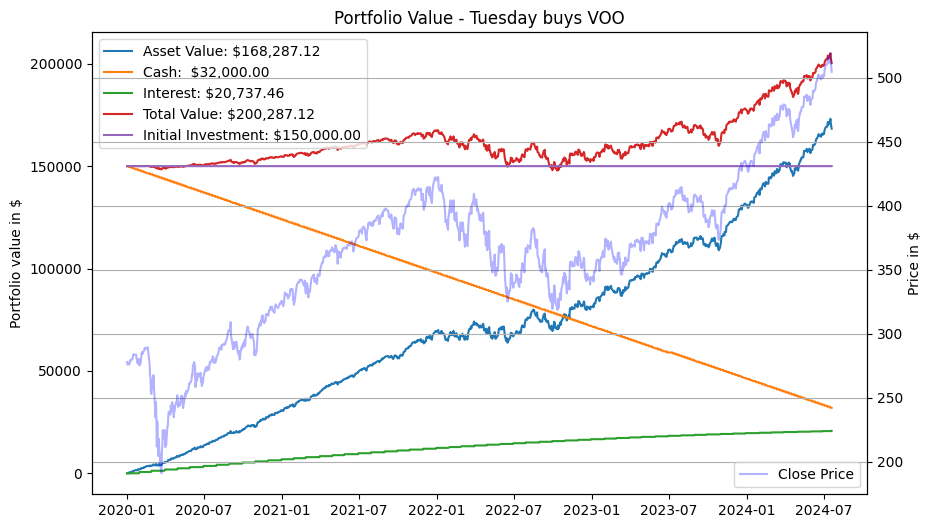

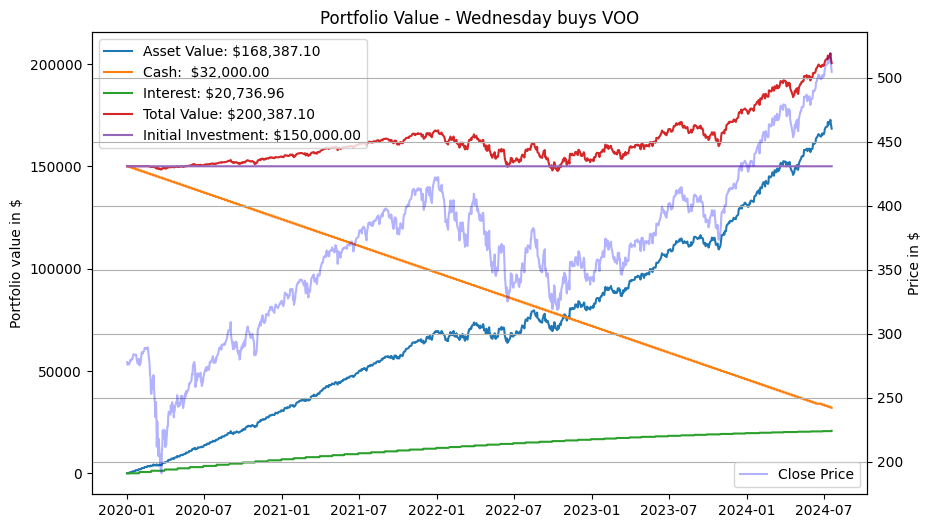

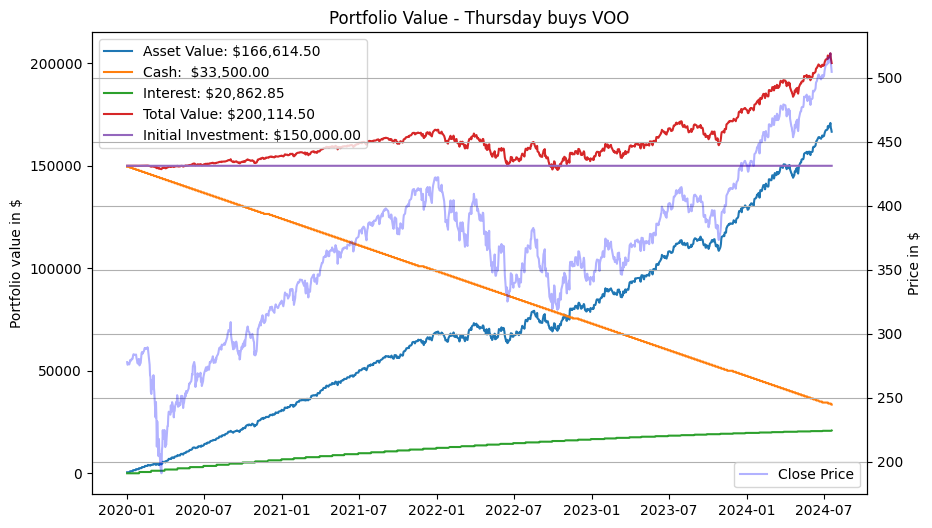

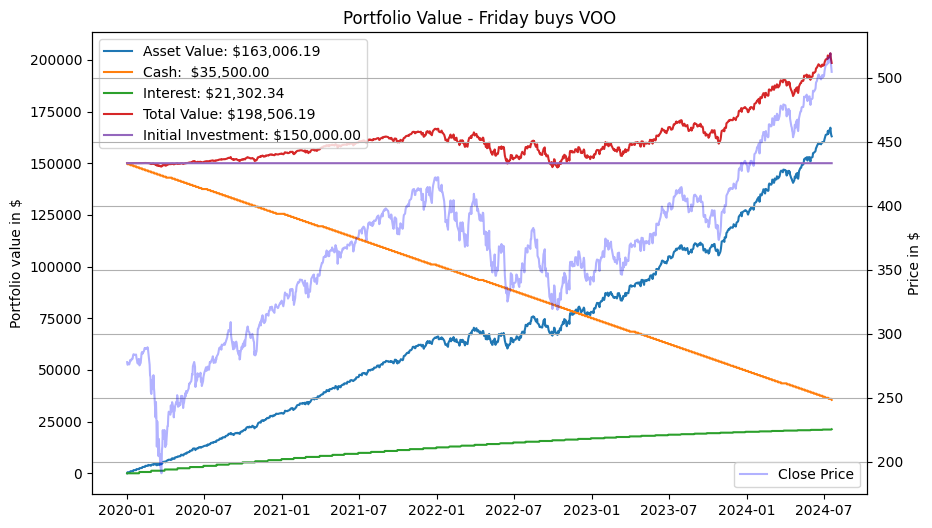

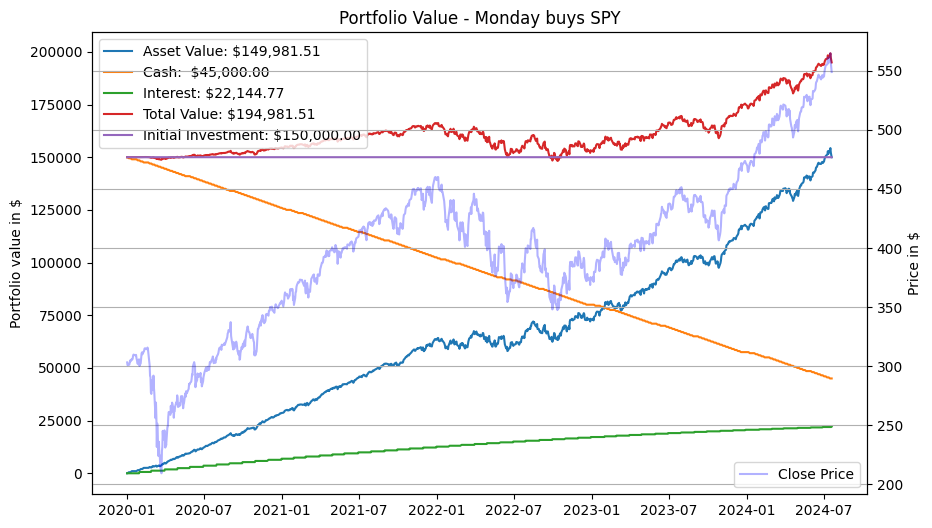

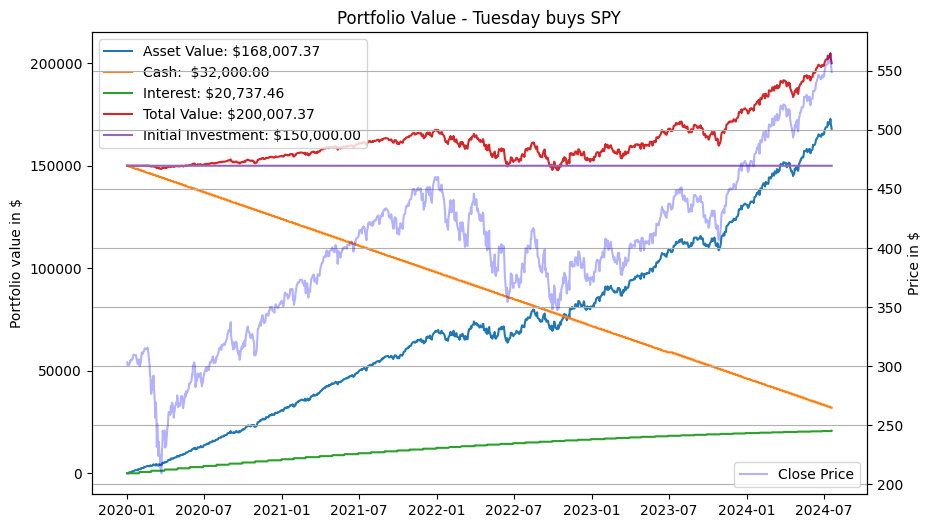

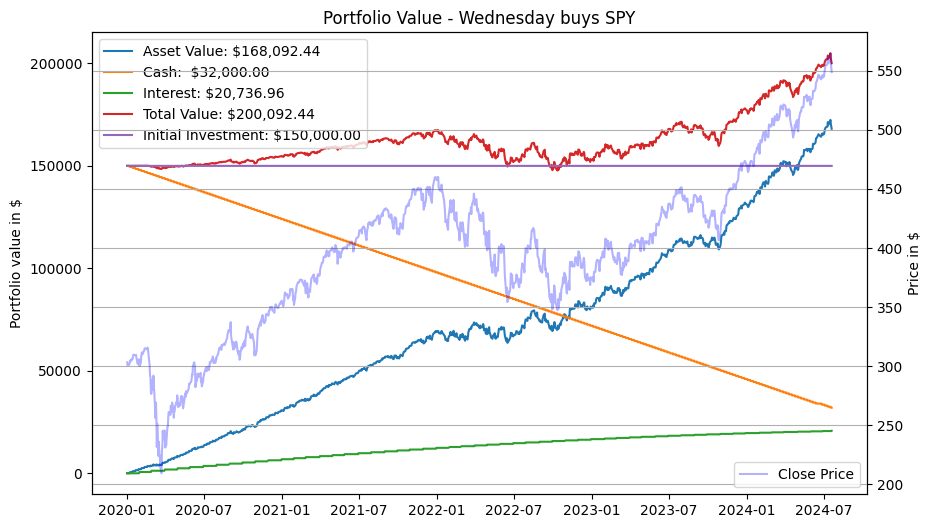

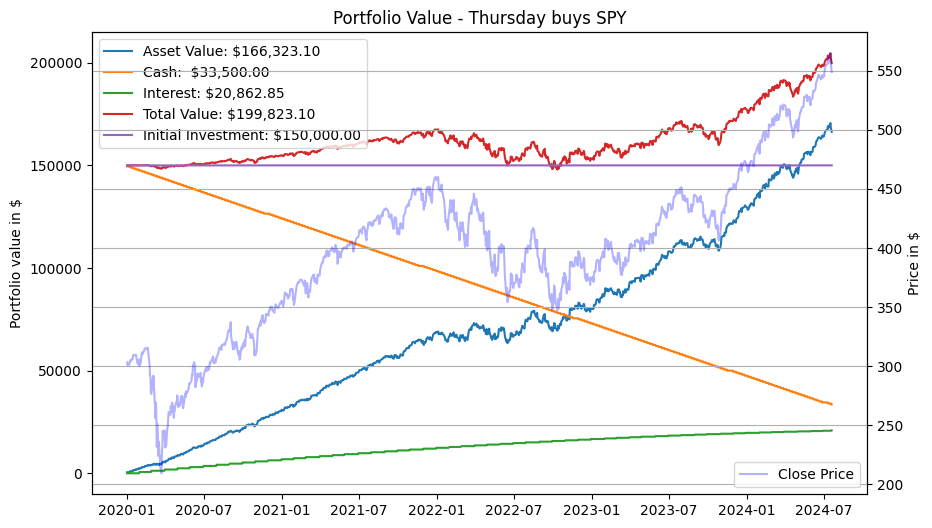

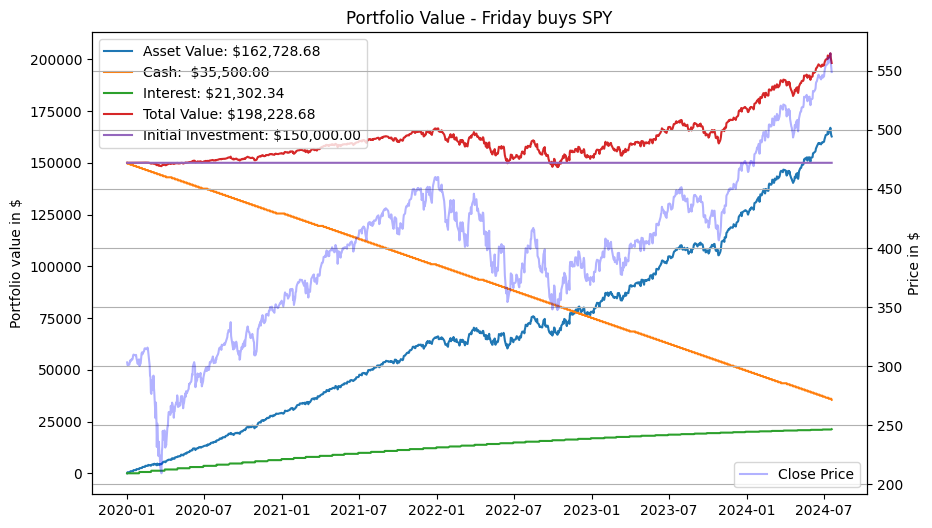

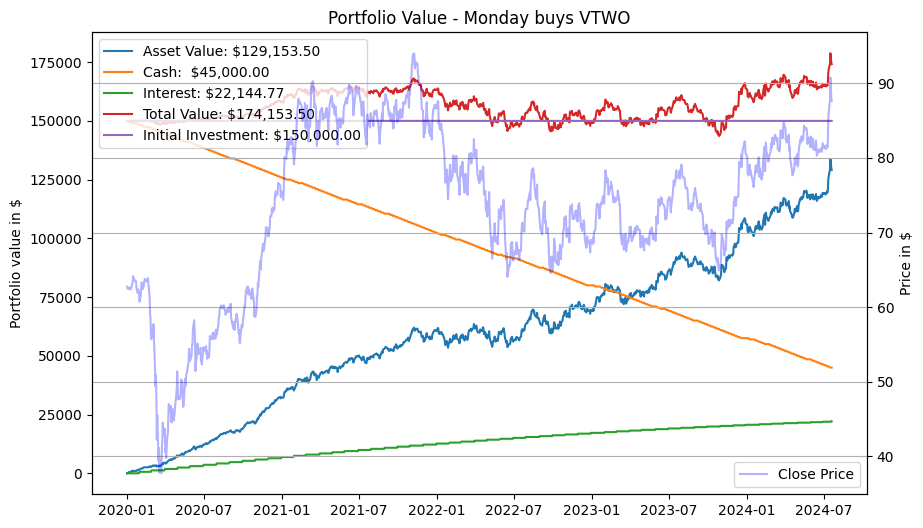

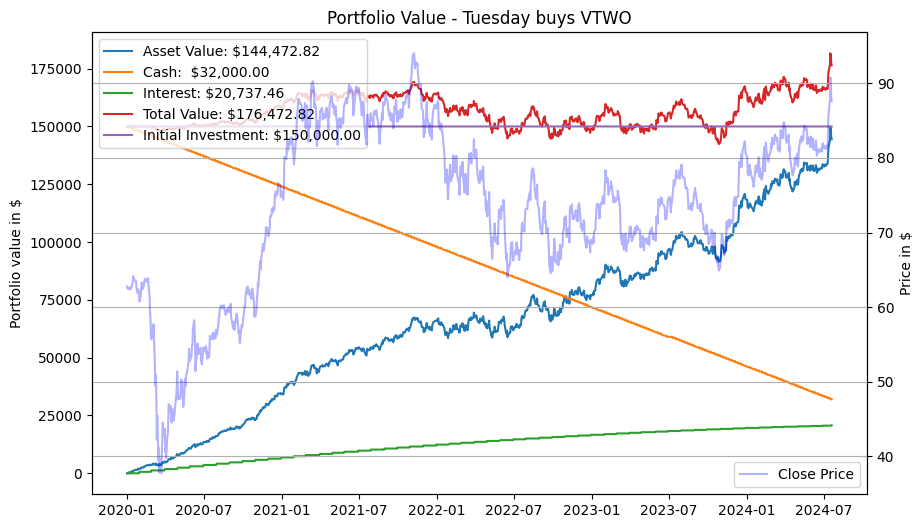

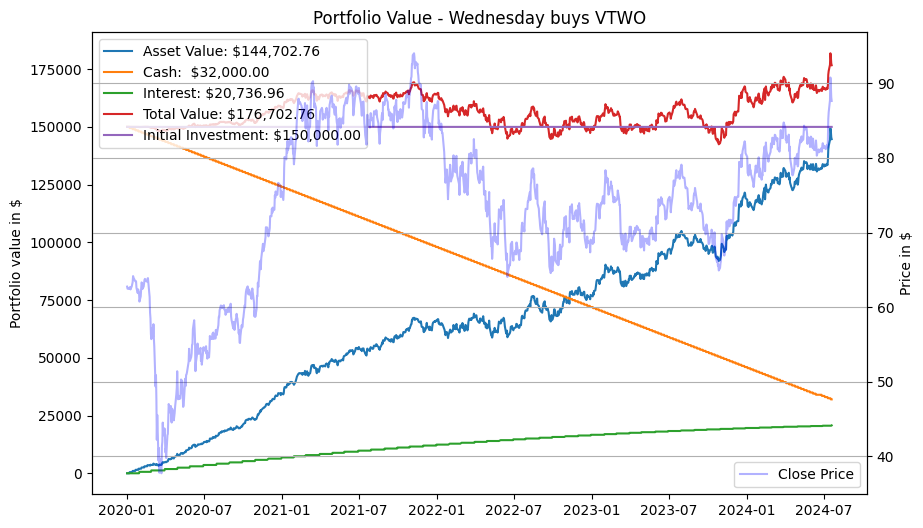

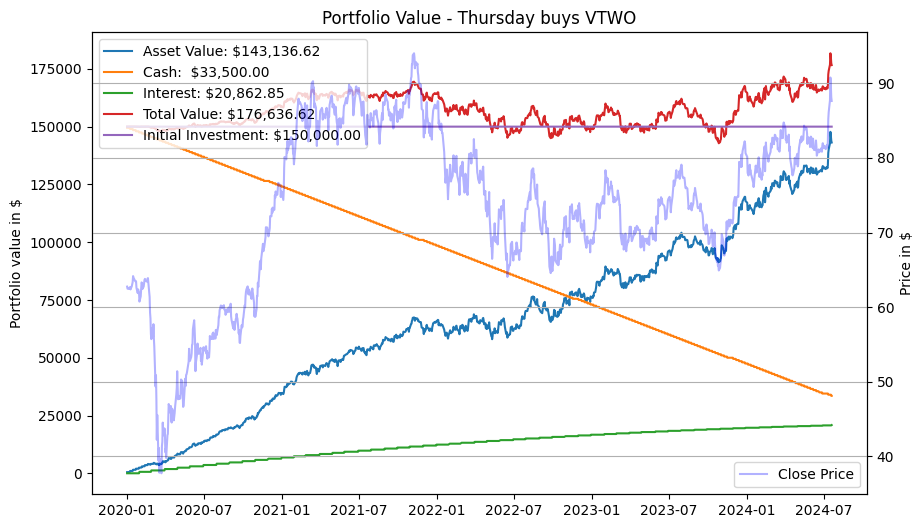

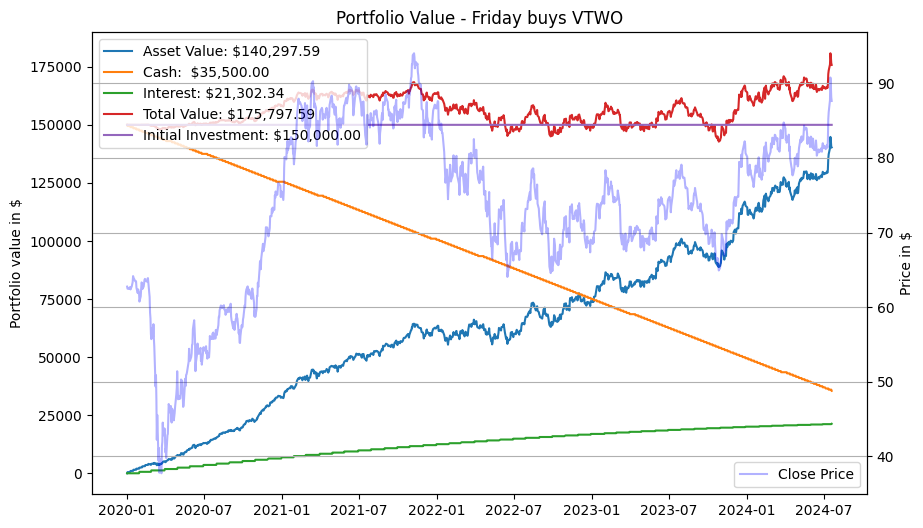

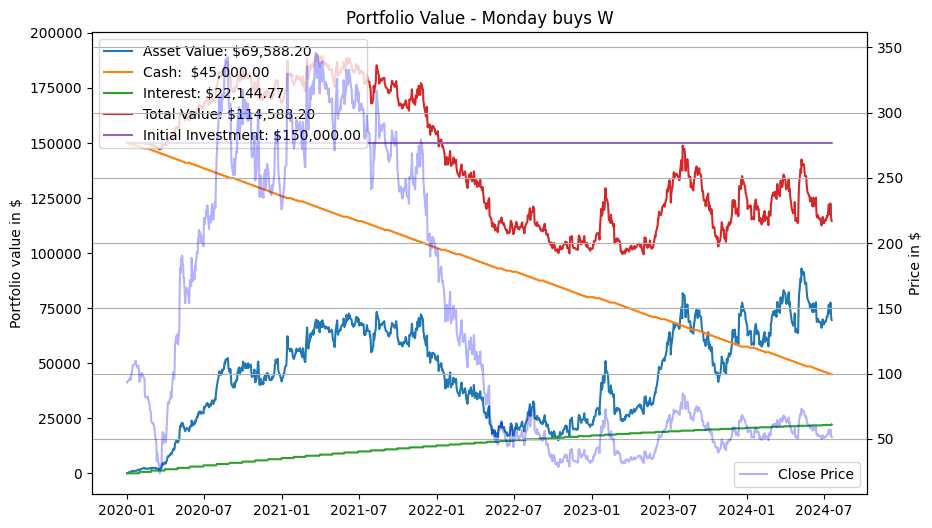

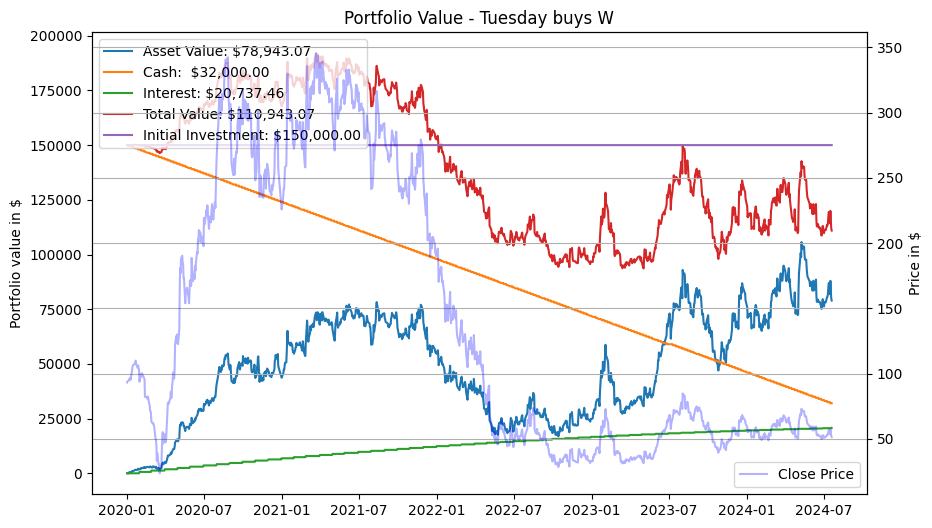

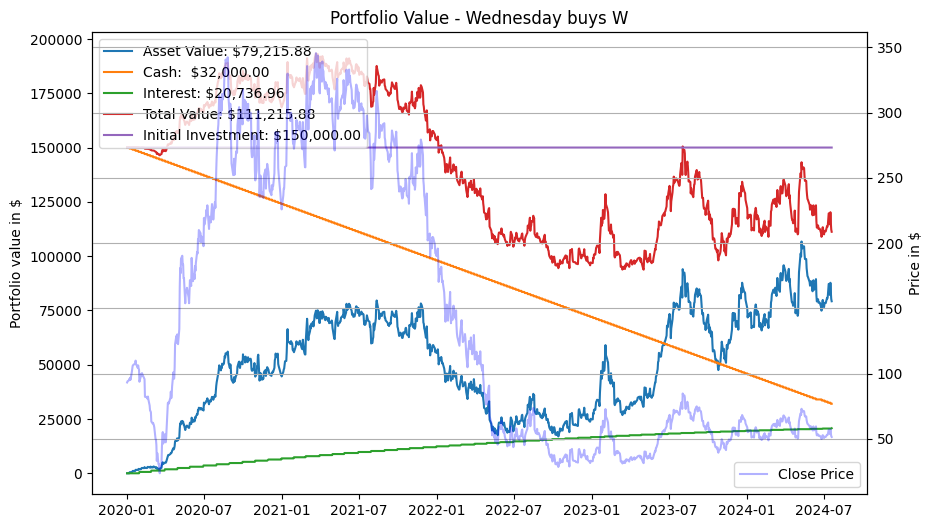

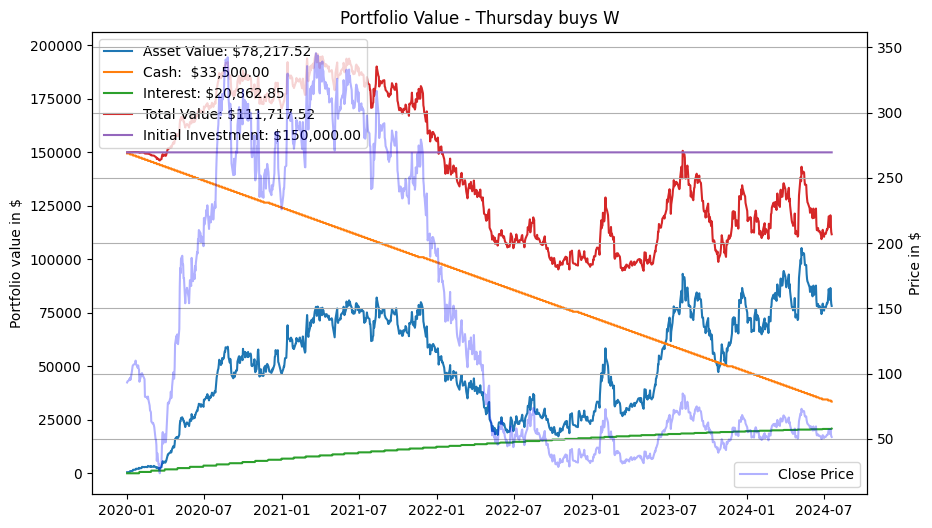

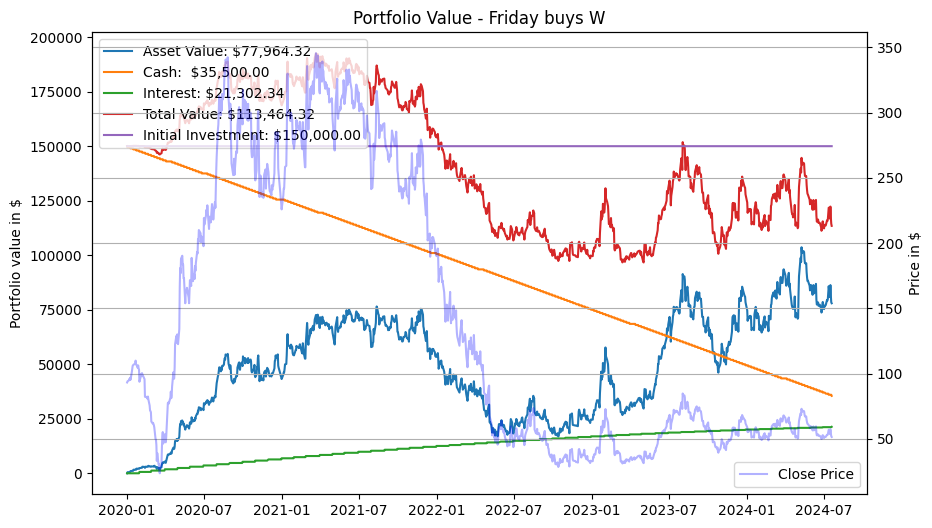

$APPL: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-07-21)


AttributeError: 'Index' object has no attribute 'dayofweek'

In [3]:
initial_capital = 150000
incremental_investment = 500
tickers = ['VOO', 'SPY', 'VTWO', 'W', 'APPL', 'META']
start_date = "2020-01-01"
end_date = "2024-07-21"

process_tickers(tickers, start_date, end_date, initial_capital, incremental_investment, True)